<h1 style="color:000000">Leukemia Classification</h1>

<h3 style="color:000000">Installing dependicies and packages</h3>

In [1]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install tensorflow
!pip install scikit-image
!pip install tqdm
!pip install scikit-learn
!pip install seaborn
!pip install opencv-contrib-python

Could not fetch URL https://pypi.org/simple/pip/: There was a problem confirming the ssl certificate: HTTPSConnectionPool(host='pypi.org', port=443): Max retries exceeded with url: /simple/pip/ (Caused by SSLError("Can't connect to HTTPS URL because the SSL module is not available.")) - skipping


Could not fetch URL https://pypi.org/simple/pip/: There was a problem confirming the ssl certificate: HTTPSConnectionPool(host='pypi.org', port=443): Max retries exceeded with url: /simple/pip/ (Caused by SSLError("Can't connect to HTTPS URL because the SSL module is not available.")) - skipping


Could not fetch URL https://pypi.org/simple/pip/: There was a problem confirming the ssl certificate: HTTPSConnectionPool(host='pypi.org', port=443): Max retries exceeded with url: /simple/pip/ (Caused by SSLError("Can't connect to HTTPS URL because the SSL module is not available.")) - skipping



Could not fetch URL https://pypi.org/simple/pip/: There was a problem confirming the ssl certificate: HTTPSConnectionPool(host='pypi.org', port=443): Max retries exceeded with url: /simple/pip/ (Caused by SSLError("Can't connect to HTTPS URL because the SSL module is not available.")) - skipping
Could not fetch URL https://pypi.org/simple/pip/: There was a problem confirming the ssl certificate: HTTPSConnectionPool(host='pypi.org', port=443): Max retries exceeded with url: /simple/pip/ (Caused by SSLError("Can't connect to HTTPS URL because the SSL module is not available.")) - skipping


Could not fetch URL https://pypi.org/simple/pip/: There was a problem confirming the ssl certificate: HTTPSConnectionPool(host='pypi.org', port=443): Max retries exceeded with url: /simple/pip/ (Caused by SSLError("Can't connect to HTTPS URL because the SSL module is not available.")) - skipping


Could not fetch URL https://pypi.org/simple/pip/: There was a problem confirming the ssl certificate: HTTPSConnectionPool(host='pypi.org', port=443): Max retries exceeded with url: /simple/pip/ (Caused by SSLError("Can't connect to HTTPS URL because the SSL module is not available.")) - skipping


Could not fetch URL https://pypi.org/simple/seaborn/: There was a problem confirming the ssl certificate: HTTPSConnectionPool(host='pypi.org', port=443): Max retries exceeded with url: /simple/seaborn/ (Caused by SSLError("Can't connect to HTTPS URL because the SSL module is not available.")) - skipping
Could not fetch URL https://pypi.org/simple/pip/: There was a problem confirming the ssl certificate: HTTPSConnectionPool(host='pypi.org', port=443): Max retries exceeded with url: /simple/pip/ (Caused by SSLError("Can't connect to HTTPS URL because the SSL module is not available.")) - skipping


ERROR: Could not find a version that satisfies the requirement seaborn
ERROR: No matching distribution found for seaborn


Could not fetch URL https://pypi.org/simple/opencv-contrib-python/: There was a problem confirming the ssl certificate: HTTPSConnectionPool(host='pypi.org', port=443): Max retries exceeded with url: /simple/opencv-contrib-python/ (Caused by SSLError("Can't connect to HTTPS URL because the SSL module is not available.")) - skipping
Could not fetch URL https://pypi.org/simple/pip/: There was a problem confirming the ssl certificate: HTTPSConnectionPool(host='pypi.org', port=443): Max retries exceeded with url: /simple/pip/ (Caused by SSLError("Can't connect to HTTPS URL because the SSL module is not available.")) - skipping


ERROR: Could not find a version that satisfies the requirement opencv-contrib-python
ERROR: No matching distribution found for opencv-contrib-python


<h3 style="color:000000">Importing libraries</h3>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import tqdm
import skimage.io
import glob
import random
from PIL import Image
import itertools

import cv2 as cv

import tensorflow_hub as hub
import seaborn as sns

from tensorflow.keras.models import load_model
from tqdm import tqdm
from skimage.io import imread, imshow
from sklearn.preprocessing import LabelEncoder
from skimage.transform import resize
from sklearn.utils import shuffle
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import InputLayer, Conv2D, BatchNormalization, MaxPool2D, Dropout, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.applications.inception_v3 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import img_to_array

from keras.utils import np_utils
from tensorflow.keras.optimizers import Adam
from keras import backend as K

<h3 style="color:000000">Utilities</h3>
<h3 style="color:blue">Confusion Matrix Plotting Function</h3>

In [2]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """


    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

<h3 style="color:000000">Data preprocessing</h3>
<h3 style="color:blue">Reading Files</h3>

<h3 style="font-weight:bold;color:red;">!!! NOTE: For test dataset, labels are not defined. So, we are not going to be able to use test dataset for testing</h3>

In [3]:
#Traning Dataset
train_dataset_0_all = glob.glob('data/training_data/fold_0/all/*.bmp')
train_dataset_0_hem = glob.glob('data/training_data/fold_0/hem/*.bmp')
train_dataset_1_all = glob.glob('data/training_data/fold_1/all/*.bmp')
train_dataset_1_hem = glob.glob('data/training_data/fold_1/hem/*.bmp')
train_dataset_2_all = glob.glob('data/training_data/fold_2/all/*.bmp')
train_dataset_2_hem = glob.glob('data/training_data/fold_2/hem/*.bmp')

#Test Dataset
test_dataset  = glob.glob('data/testing_data/C-NMC_test_final_phase_data/*.bmp')

#Validation Dataset (Images)
valid_dataset = glob.glob('data/validation_data/C-NMC_test_prelim_phase_data/*.bmp')

#Validation Dataset (.CSV)
valid_data = pd.read_csv('data/validation_data/C-NMC_test_prelim_phase_data_labels.csv')

<h3 style="color:000000">Data preprocessing cont.</h3>
<h3 style="color:blue">Collecting Images</h3>

In [4]:
ALL = []
HEM = []
images = []
labels = []

ALL.extend(train_dataset_0_all)
ALL.extend(train_dataset_1_all)
ALL.extend(train_dataset_2_all)

HEM.extend(train_dataset_0_hem)
HEM.extend(train_dataset_1_hem)
HEM.extend(train_dataset_2_hem)

images.extend(HEM)
images.extend(ALL)

<h3 style="color:000000">Data preprocessing</h3>
<h3 style="color:blue">Load the data</h3>

In [5]:
X_train = []
y_train = []

for i in range(0, len(ALL)):
    X_train.append(ALL[i])
    y_train.append(0)
    
for i in range(0, len(HEM)):
    X_train.append(HEM[i])
    y_train.append(1)
    
df = pd.DataFrame({'images' : X_train, 'labels' : y_train})
print(df)

                                                  images  labels
0       data/training_data/fold_0/all/UID_20_1_1_all.bmp       0
1        data/training_data/fold_0/all/UID_4_4_2_all.bmp       0
2      data/training_data/fold_0/all/UID_45_30_2_all.bmp       0
3       data/training_data/fold_0/all/UID_28_2_3_all.bmp       0
4       data/training_data/fold_0/all/UID_35_8_7_all.bmp       0
...                                                  ...     ...
10656  data/training_data/fold_2/hem/UID_H5_12_2_hem.bmp       1
10657  data/training_data/fold_2/hem/UID_h3_18_1_hem.bmp       1
10658  data/training_data/fold_2/hem/UID_H40_10_2_hem...       1
10659   data/training_data/fold_2/hem/UID_H5_4_1_hem.bmp       1
10660  data/training_data/fold_2/hem/UID_H23_28_2_hem...       1

[10661 rows x 2 columns]


In [6]:
valid_data.head(10)

,Patient_ID,new_names,labels
0,UID_57_29_1_all.bmp,1.bmp,1
1,UID_57_22_2_all.bmp,2.bmp,1
2,UID_57_31_3_all.bmp,3.bmp,1
3,UID_H49_35_1_hem.bmp,4.bmp,0
4,UID_58_6_13_all.bmp,5.bmp,1
5,UID_57_8_11_all.bmp,6.bmp,1
6,UID_H49_29_2_hem.bmp,7.bmp,0
7,UID_H30_6_2_hem.bmp,8.bmp,0
8,UID_58_2_1_all.bmp,9.bmp,1
9,UID_54_35_3_all.bmp,10.bmp,1


In [7]:
X_val = []
y_val = []

for img_name in valid_data.new_names:
    X_val.append('data/validation_data/C-NMC_test_prelim_phase_data/' + img_name)
for label_name in valid_data.labels.values:
    y_val.append(label_name)

<h3 style="color:000000">Data preprocessing</h3>
<h3 style="color:blue">Parameter Selecting</h3>

In [8]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
BATCH_SIZE = 32
IMG_SIZE = 128
EPOCHS = 100
CLASS_NAMES = ["ALL", "HEM"]

<h3 style="color:000000">Data preprocessing</h3>
<h3 style="color:blue">ONE-HOT Encoding</h3>

In [9]:
y_train = tf.keras.utils.to_categorical(np.array(y_train), 2)
ds = tf.data.Dataset.from_tensor_slices((X_train,y_train))

In [10]:
def process_dataset(image,label):
    img = tf.io.read_file(image)
    img = tf.io.decode_bmp(img, channels=3)
    img = tf.image.resize(img, [IMG_SIZE,IMG_SIZE])
    return img, label

ds = ds.map(process_dataset, num_parallel_calls=AUTOTUNE)

In [11]:
val_size = int(len(images) * 0.2)
ds = ds.shuffle(10000)

val_ds = ds.take(val_size)
train_ds = ds.skip(val_size)

print('Training dataset :',tf.data.experimental.cardinality(train_ds).numpy())
print('Validation dataset :',tf.data.experimental.cardinality(val_ds).numpy())

Training dataset : 8529
Validation dataset : 2132


In [12]:
def prepare_for_training(ds):
    ds = ds.cache()
    ds = ds.shuffle(buffer_size=1000)
    ds = ds.batch(BATCH_SIZE)
    ds = ds.prefetch(buffer_size=AUTOTUNE)
    return ds

train_ds = prepare_for_training(train_ds)
val_ds = prepare_for_training(val_ds)

In [13]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))

In [14]:
X_train = np.concatenate([x for x, y in train_ds], axis=0)
y_train = np.concatenate([y for x, y in train_ds], axis=0)
X_val = np.concatenate([x for x, y in val_ds], axis=0)
y_val = np.concatenate([y for x, y in val_ds], axis=0)

X_train.shape,y_train.shape,X_val.shape,y_val.shape,

((8529, 128, 128, 3), (8529, 2), (2132, 128, 128, 3), (2132, 2))

<h3 style="color:000000">Convolutional Neural Network</h3>
<h3 style="color:blue">InceptionV3</h3>

![inceptionv3onc--oview_vjAbOfw.png](./images/inceptionv3onc--oview_vjAbOfw.png)

<h3 style="color:000000">InceptionV3</h3>
<h3 style="color:blue">Model Tuning</h3>

In [17]:
inception_v3 = 'https://tfhub.dev/google/tf2-preview/inception_v3/feature_vector/4'

inception_v3_model = tf.keras.Sequential([
    hub.KerasLayer(inception_v3, output_shape=[2048], input_shape=(IMG_SIZE, IMG_SIZE,3), trainable=False)
])

In [18]:
model = tf.keras.Sequential([
    
    inception_v3_model,
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.4),

    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),

    layers.Dense(2, activation = "softmax")
])

model.compile(
    loss="categorical_crossentropy", 
    metrics = ['accuracy'], 
    optimizer = 'adam'
)

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 2048)              21802784  
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              2098176   
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)              

<h3 style="color:000000">Data preprocessing cont.</h3>
<h3 style="color:blue">Balancing Weights</h3>

In [20]:
train_0 = len(df[df.labels == 0])
train_1 = len(df[df.labels == 1])
train_total = train_0 + train_1

initial_bias = np.log([train_0 / train_1])

weight_0 = (1 / train_0) * (train_total) / 2.0
weight_1 = (1 / train_1) * (train_total) / 2.0

class_weight = {0: weight_0, 1: weight_1}

print("Total ALL: " + format(train_0))
print("Total Normal: " + format(train_1))
print("Initial bias: {:.5f}".format(initial_bias[0]))
print("Weight for class 0: {:.2f}".format(weight_0))
print("Weight for class 1: {:.2f}".format(weight_1))
print(class_weight)

Total ALL: 7272
Total Normal: 3389
Initial bias: 0.76350
Weight for class 0: 0.73
Weight for class 1: 1.57
{0: 0.7330170517051705, 1: 1.5728828562997934}


<h3 style="color:000000">InceptionV3</h3>
<h3 style="color:blue">Callbacks</h3>

In [19]:
callbacks = [
    tf.keras.callbacks.ModelCheckpoint("model.h5", verbose = 1, save_best_only=True),
    tf.keras.callbacks.EarlyStopping(verbose = 1, patience=10, restore_best_weights=True)
]

<h3 style="color:000000">InceptionV3</h3>
<h3 style="color:blue">Training</h3>

In [21]:
H = model.fit(
    train_ds,
    epochs = EPOCHS,
    validation_data = val_ds,
    callbacks = callbacks,
    class_weight = class_weight)

Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.


Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.


Epoch 1/100
334/334 [==============================] - 60s 141ms/step - loss: 0.7374 - accuracy: 0.6661 - val_loss: 0.5255 - val_accuracy: 0.7786

Epoch 00001: val_loss improved from inf to 0.52550, saving model to model.h5
Epoch 2/100
334/334 [==============================] - 44s 132ms/step - loss: 0.5461 - accuracy: 0.7569 - val_loss: 0.4655 - val_accuracy: 0.8133

Epoch 00002: val_loss improved from 0.52550 to 0.46549, saving model to model.h5
Epoch 3/100
334/334 [==============================] - 44s 133ms/step - loss: 0.5289 - accuracy: 0.7756 - val_loss: 0.5060 - val_accuracy: 0.8171

Epoch 00003: val_loss did not improve from 0.46549
Epoch 4/100
334/334 [==============================] - 46s 137ms/step - loss: 0.5108 - accuracy: 0.7884 - val_loss: 0.5082 - val_accuracy: 0.8344

Epoch 00004: val_loss did not improve from 0.46549
Epoch 5/100
334/334 [==============================] - 47s 140ms/step - loss: 0.5016 - accuracy: 0.7944 - val_loss: 0.4770 - val_accuracy: 0.8340

Epoch

In [22]:
model.save('inceptionv3-model')

In [23]:
val_accuracy = np.mean(H.history['val_accuracy'])
print("\n%s: %.2f%%" % ('val_accuracy', val_accuracy*100))


accuracy = np.mean(H.history['accuracy'])
print("\n%s: %.2f%%" % ('accuracy', accuracy*100))


val_accuracy: 87.06%

accuracy: 83.78%


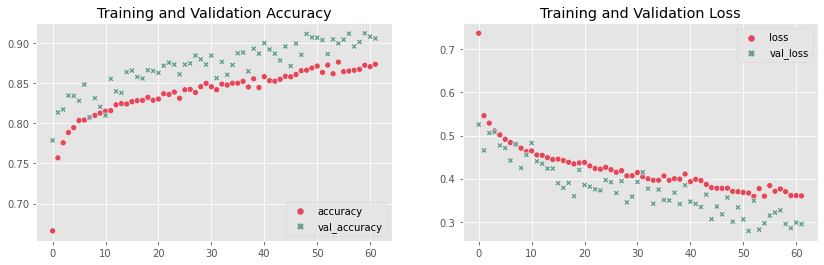

In [25]:
history_df = pd.DataFrame(H.history)

plt.figure(figsize=(14, 4))
plt.subplot(1,2,1)
sns.scatterplot(data=history_df[['accuracy','val_accuracy']], palette=['#E2485A', '#679B8B']);
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
sns.scatterplot(data=history_df[['loss','val_loss']], palette=['#E2485A', '#679B8B'])
plt.title('Training and Validation Loss')

plt.show()

In [21]:
model = tf.keras.models.load_model('inceptionv3-model')

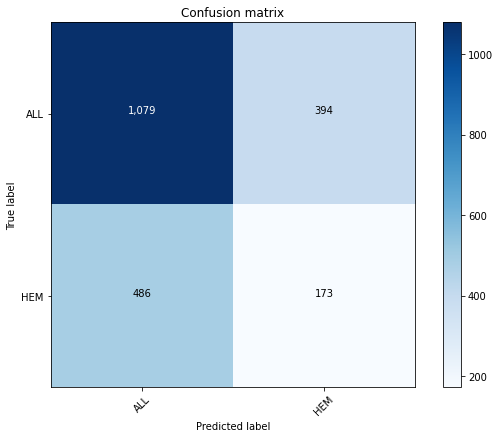

In [21]:
y_test_arg=np.argmax(y_val,axis=1)
Y_pred = np.argmax(model.predict(X_val),axis=1)
cm = confusion_matrix(y_test_arg, Y_pred)
plot_confusion_matrix(cm=cm, normalize=False,target_names=CLASS_NAMES)

In [47]:
print(classification_report(y_test_arg, Y_pred, target_names=CLASS_NAMES))

              precision    recall  f1-score   support

         ALL       0.69      0.73      0.71      1473
         HEM       0.31      0.26      0.28       659

    accuracy                           0.59      2132
   macro avg       0.50      0.50      0.50      2132
weighted avg       0.57      0.59      0.58      2132



In [ ]:
#new_model = tf.keras.models.load_model('inceptionv3-model/model.h5',custom_objects={'KerasLayer':hub.KerasLayer})
#new_model.summary()

[0.9826962 0.0173038]
UID_57_9_1_all.bmp


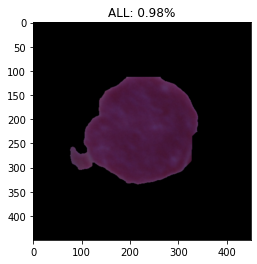

In [30]:
test_img_path = random.choice(valid_dataset)

test_img = cv.imread(test_img_path)

img = cv.imread(test_img_path)
img = cv.resize(img, (128,128))
img = img.astype("float") / 255.0
img = img_to_array(img)
img = np.expand_dims(img, axis=0)

preds = model.predict(img)[0]
print(preds)

j = np.argmax(preds)
label = CLASS_NAMES[j]

bmp_f = test_img_path.split(os.sep)[-1]

label = "{}: {:.2f}%".format(label, preds[j])


plt.title(label)
plt.imshow(test_img)

print(valid_data[valid_data["new_names"] == bmp_f].Patient_ID.values[0])